# Lab-3

## Import of libraries & dataset

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import norm, skew, kurtosis, shapiro, chisquare, gaussian_kde, kstest, ttest_ind, spearmanr
from statistics import correlation
import statsmodels.api as sm

In [2]:
dataset = datasets.load_iris()

ext_target = dataset.target[:, None]
iris_data_frame = pd.DataFrame(
    np.concatenate((dataset.data, ext_target, dataset.target_names[ext_target]), axis=1),
    columns=dataset.feature_names + ['target label', 'target name'])
iris_data_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target label,target name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


## Choose random sample: SEPALLEN for SETOSA * VERSICOLOR * VIRGINICA

In [3]:
sepallen_df = iris_data_frame[['sepal length (cm)', 'target label', 'target name']]
sepallen_df

,sepal length (cm),target label,target name
0,5.1,0,setosa
1,4.9,0,setosa
2,4.7,0,setosa
3,4.6,0,setosa
4,5.0,0,setosa
...,...,...,...
145,6.7,2,virginica
146,6.3,2,virginica
147,6.5,2,virginica
148,6.2,2,virginica


In [4]:
sepallen_sample = iris_data_frame['sepal length (cm)'].astype(float)
sepallen_sample

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64

In [5]:
variables = iris_data_frame[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].astype(float)
variables

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Check if SEPALLEN has normal disctribution for all types of iris

### Distribution hist of SEPALLEN

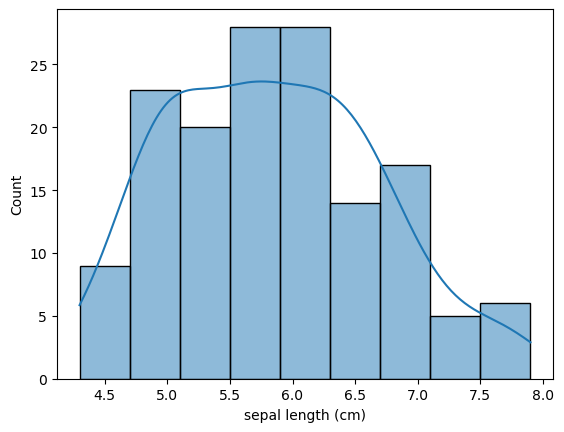

In [6]:
sns.histplot(data=sepallen_sample, kde=True)
None

### Check $H_0$ = dist is normal

In [40]:
expected = norm(loc=sepallen_sample.mean(), scale=sepallen_sample.std()).rvs(size=150)
ks_test = kstest(sepallen_sample, expected)
chis_test = chisquare(f_obs=sepallen_sample.value_counts(), ddof=0, axis=None)
print('Kolmogorov-Smirnov test: ' + str(ks_test.pvalue))
print('Chi-Square test: ' + str(chis_test.pvalue))

Kolmogorov-Smirnov test: 0.4425235033915137
Chi-Square test: 0.003872724868604134


KS Test has P-value $> 0.05 => H_0$ is not rejected

### Descriptive statistics of SEPALLEN

In [8]:
desc_stats = pd.DataFrame(pd.concat([sepallen_sample.describe(), 
                        pd.Series(data=sepallen_sample.median(), index=['median']), 
                        pd.Series(data=sepallen_sample.mode()[0], index=['mode']),
                        pd.Series(data=skew(sepallen_sample, bias=False), index=['skewness']), 
                        pd.Series(data=kurtosis(sepallen_sample, bias=False), index=['kurtosis']) ]), 
                        columns=['petallen']).T
desc_stats

,count,mean,std,min,25%,50%,75%,max,median,mode,skewness,kurtosis
petallen,150.0,5.843333,0.828066,4.3,5.1,5.8,6.4,7.9,5.8,5.0,0.314911,-0.552064


mean $\approx$ median $\ne$ mode

### BoxPlot

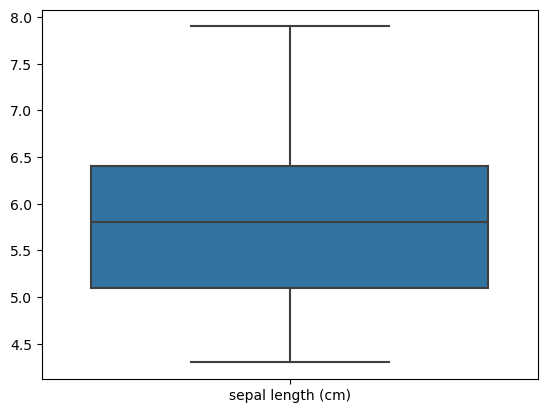

In [9]:
sns.boxplot(data=pd.DataFrame(sepallen_sample))
None

### QQplot

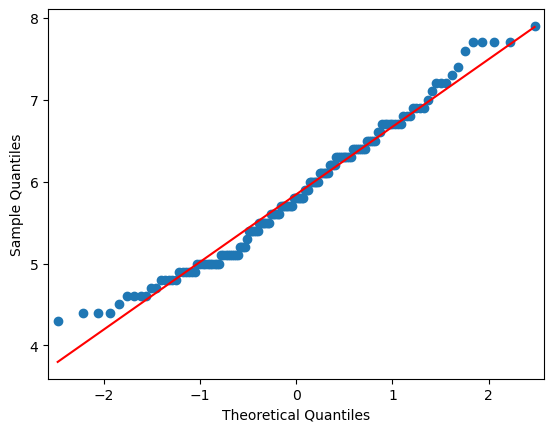

In [10]:
fig = sm.qqplot(sepallen_sample, line='s')
plt.show()

## Correlation analysis where SEPALLEN dep.variable

### Correlation matrix

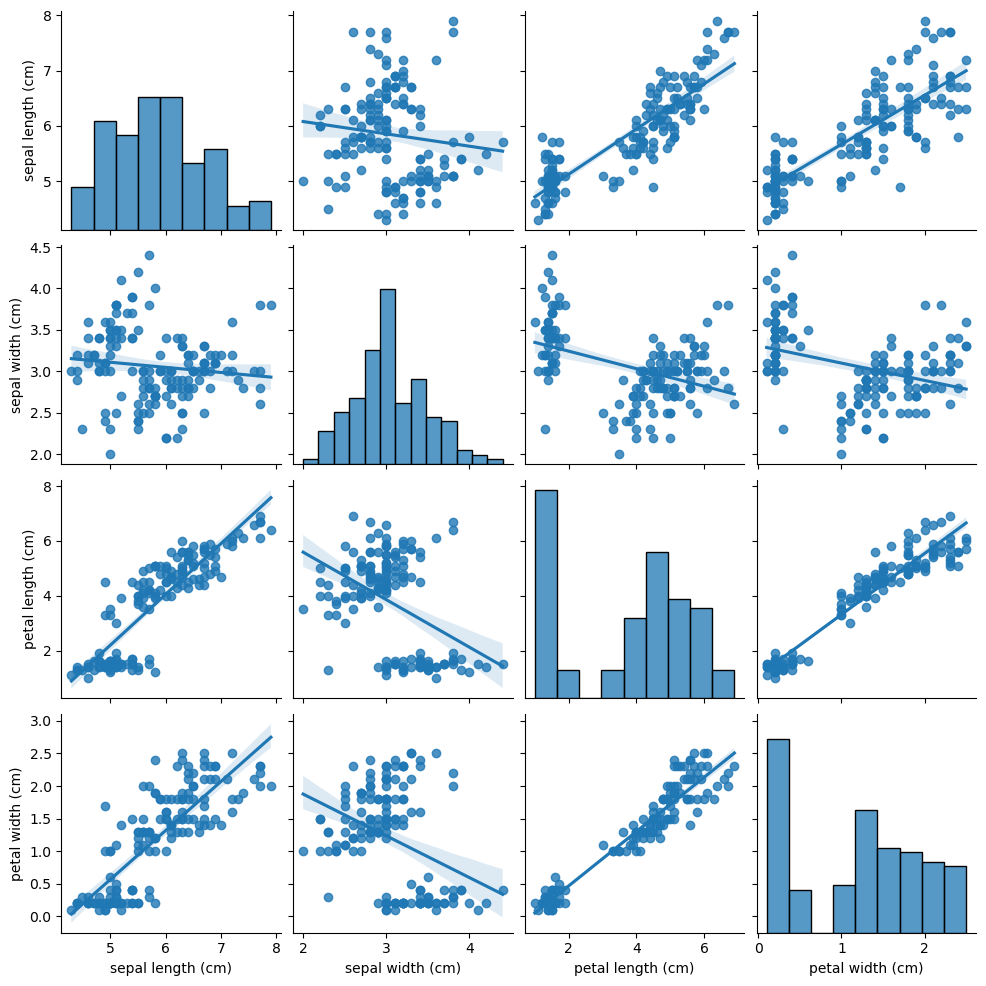

In [11]:
sns.pairplot(data=iris_data_frame[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].astype(float), 
             kind='reg', diag_kind='auto')
None

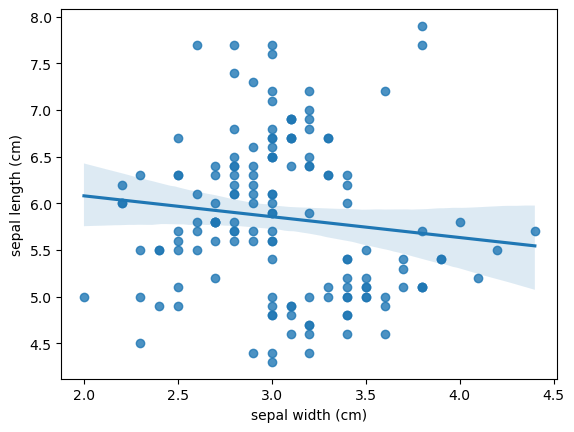

In [12]:
sns.regplot(
    x='sepal width (cm)', 
    y='sepal length (cm)', 
    data=iris_data_frame[['sepal length (cm)', 'sepal width (cm)']].astype(float))
None

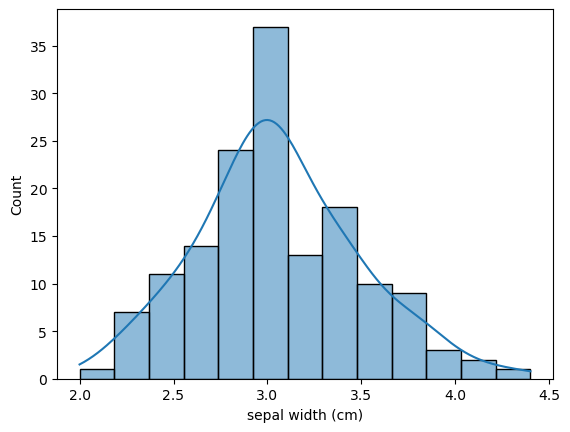

In [13]:
sns.histplot(data=iris_data_frame['sepal width (cm)'].astype(float), kde=True)
None

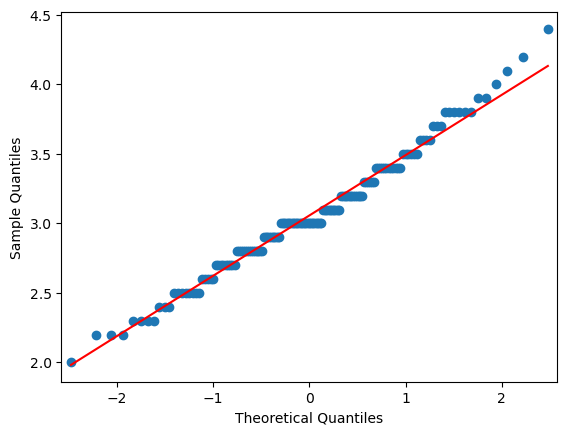

In [14]:
fig = sm.qqplot(iris_data_frame['sepal width (cm)'].astype(float), line='s')
plt.show()

In [15]:
expected = norm(loc=iris_data_frame['sepal width (cm)'].astype(float).mean(), scale=iris_data_frame['sepal width (cm)'].astype(float).std()).rvs(size=150)
ks_test = kstest(iris_data_frame['sepal width (cm)'].astype(float), expected)
print('Kolmogorov-Smirnov test: ' + str(ks_test.pvalue))

Kolmogorov-Smirnov test: 0.29107399113413146


In [16]:
corr = correlation(iris_data_frame['sepal length (cm)'].astype(float), iris_data_frame['sepal width (cm)'].astype(float))
print('pearson correlation coefficient: ' + str(corr))
ttest_result = stats.ttest_ind(iris_data_frame['sepal length (cm)'].astype(float), iris_data_frame['sepal width (cm)'].astype(float))
print('T-test P-value: ' + str(ttest_result.pvalue))

pearson correlation coefficient: -0.11756978413300204
T-test P-value: 7.027919392009369e-112


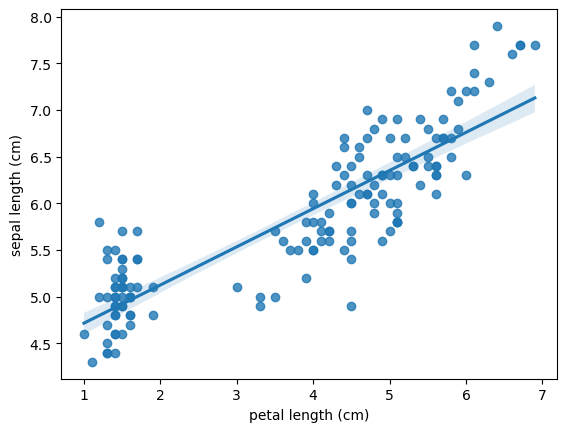

In [17]:
sns.regplot(
    x='petal length (cm)', 
    y='sepal length (cm)', 
    data=iris_data_frame[['sepal length (cm)', 'petal length (cm)']].astype(float))
None

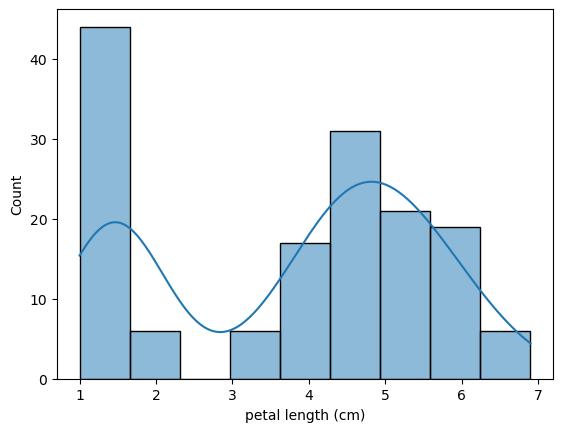

In [18]:
sns.histplot(data=iris_data_frame['petal length (cm)'].astype(float), kde=True)
None

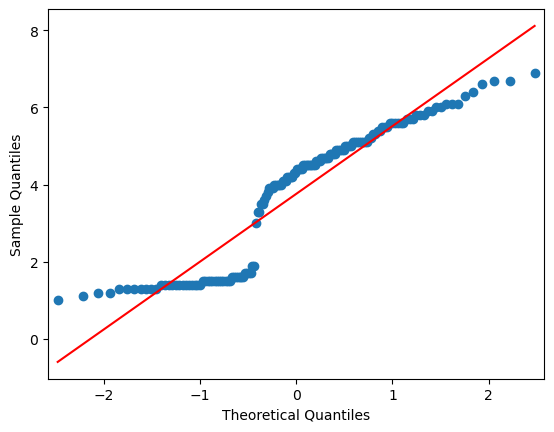

In [19]:
fig = sm.qqplot(iris_data_frame['petal length (cm)'].astype(float), line='s')
plt.show()

In [41]:
expected = norm(loc=iris_data_frame['petal length (cm)'].astype(float).mean(), scale=iris_data_frame['petal length (cm)'].astype(float).std()).rvs(size=150)
ks_test = kstest(iris_data_frame['petal length (cm)'].astype(float), expected)
print('Kolmogorov-Smirnov test: ' + str(ks_test.pvalue))

KeyError: 'petal length (cm)'

In [21]:
rho, p = spearmanr(iris_data_frame['sepal length (cm)'].astype(float), iris_data_frame['petal length (cm)'].astype(float))
print('spearman correlation coefficient: ' + str(rho))
print('spearman P-value: ' + str(p))

spearman correlation coefficient: 0.881898126434986
spearman P-value: 3.4430872780470036e-50


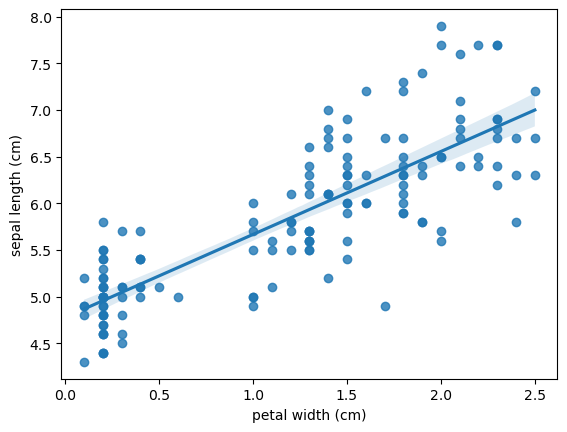

In [22]:
sns.regplot(
    x='petal width (cm)', 
    y='sepal length (cm)', 
    data=iris_data_frame[['sepal length (cm)', 'petal width (cm)']].astype(float))
None

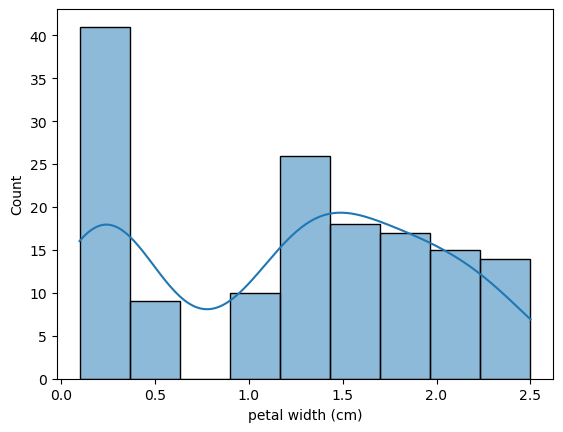

In [23]:
sns.histplot(data=iris_data_frame['petal width (cm)'].astype(float), kde=True)
None

In [24]:
expected = norm(loc=iris_data_frame['petal width (cm)'].astype(float).mean(), scale=iris_data_frame['petal width (cm)'].astype(float).std()).rvs(size=150)
ks_test = kstest(iris_data_frame['petal width (cm)'].astype(float), expected)
print('Kolmogorov-Smirnov test: ' + str(ks_test.pvalue))

Kolmogorov-Smirnov test: 0.010603075080924049


In [25]:
rho, p = spearmanr(iris_data_frame['sepal length (cm)'].astype(float), iris_data_frame['petal width (cm)'].astype(float))
print('spearman correlation coefficient: ' + str(rho))
print('spearman P-value: ' + str(p))

spearman correlation coefficient: 0.8342887759080051
spearman P-value: 4.1894466773905186e-40


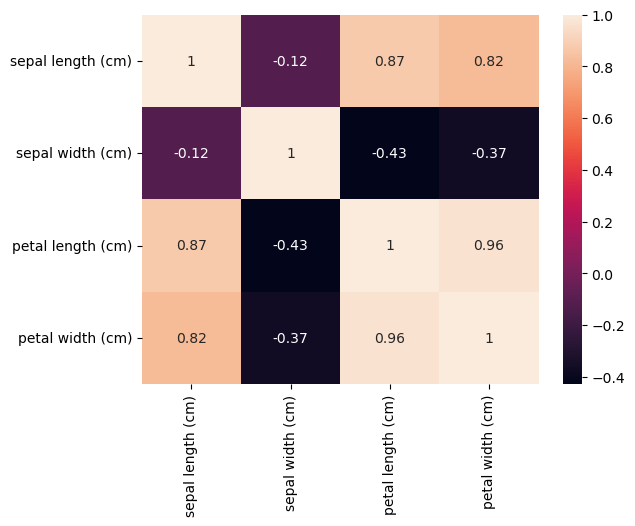

In [26]:
sns.heatmap(variables.corr(), annot = True)
None

In [27]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
y=iris_data_frame[['sepal length (cm)']].astype(float)
X=iris_data_frame[['sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].astype(float)
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      sepal length (cm)   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     295.5
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           8.59e-62
Time:                        12:59:00   Log-Likelihood:                -37.321
No. Observations:                 150   AIC:                             82.64
Df Residuals:                     146   BIC:                             94.69
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.8560      0.251      7.401      0.000       1.360       2.352
sepal width (cm)      0.6508      0.067      9.765      0.000       0.519       0.783
petal length (cm)     0.7091      0.057     12.502      0.000       0.597       0.821
petal width (cm)     -0.5565      0.128     -4.363      0.000      -0.809      -0.304
==============================================================================
Omnibus:                        0.345   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.842   Jarque-Bera (JB):                0.504
Skew:                           0.007   Prob(JB):                        0.777
Kurtosis:                       2.716   Cond. No.                         54.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
print('PETALLEN P-value:', results.pvalues.loc['petal length (cm)'])
print('PETALWID P-value:', results.pvalues.loc['petal width (cm)'])

PETALLEN P-value: 7.656980454117223e-25
PETALWID P-value: 2.4128756861180435e-05


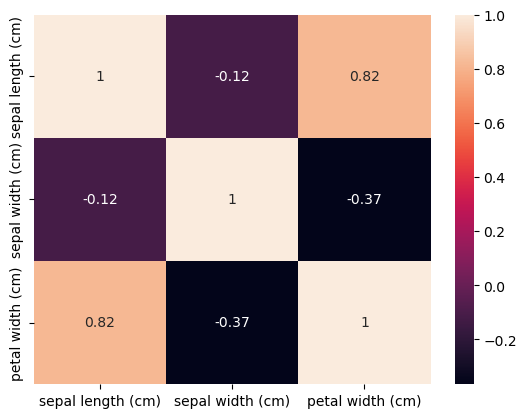

In [29]:
variables = iris_data_frame[['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)']].astype(float)
sns.heatmap(variables.corr(), annot = True)
None

In [30]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
y=iris_data_frame[['sepal length (cm)']].astype(float)
X=iris_data_frame[['sepal width (cm)', 'petal width (cm)']].astype(float)
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      sepal length (cm)   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     177.6
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           6.15e-40
Time:                        12:59:01   Log-Likelihood:                -91.910
No. Observations:                 150   AIC:                             189.8
Df Residuals:                     147   BIC:                             198.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.4573      0.309     11.182      0.000       2.846       4.068
sepal width (cm)     0.3991      0.091      4.380      0.000       0.219       0.579
petal width (cm)     0.9721      0.052     18.659      0.000       0.869       1.075
==============================================================================
Omnibus:                        2.095   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.351   Jarque-Bera (JB):                1.677
Skew:                           0.239   Prob(JB):                        0.432
Kurtosis:                       3.198   Cond. No.                         30.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
linreg = LinearRegression()
linreg.fit(X, y)
predicted_values = linreg.predict(X)
residuals = (iris_data_frame[['sepal length (cm)']].astype(float).to_numpy().T - predicted_values.T).T
print(*residuals, sep='\n')

[0.05149289]
[0.05102829]
[-0.22878587]
[-0.28887879]
[-0.08841419]
[-0.00256136]
[-0.50581299]
[-0.00860003]
[-0.40906463]
[0.10833417]
[0.27167873]
[-0.20860003]
[0.04824125]
[-0.45175875]
[0.55195749]
[0.09790325]
[-0.00256136]
[-0.04572007]
[0.43455869]
[-0.16544131]
[0.39139997]
[-0.2227472]
[-0.48841419]
[-0.16033185]
[-0.20860003]
[0.15102829]
[-0.20302596]
[0.15149289]
[0.19139997]
[-0.22878587]
[-0.08887879]
[0.19697404]
[0.00926338]
[0.17214334]
[0.01112121]
[0.07121413]
[0.45149289]
[-0.09120122]
[-0.44897171]
[0.09139997]
[-0.14572007]
[-0.16683512]
[-0.52878587]
[-0.43735897]
[-0.26265428]
[-0.14618468]
[-0.06822835]
[-0.32878587]
[0.17167873]
[0.03130705]
[0.90465855]
[0.20744559]
[0.74735267]
[-0.13896477]
[0.4670739]
[-0.13850017]
[-0.02967446]
[-0.48723296]
[0.72159275]
[-0.69580605]
[-0.22760464]
[-0.21274026]
[0.6925812]
[0.12437979]
[-0.27840725]
[0.64456563]
[-0.51274026]
[0.29304581]
[0.40651638]
[0.075647]
[-0.58419331]
[0.26149983]
[0.38679514]
[0.3587128]
[0.52

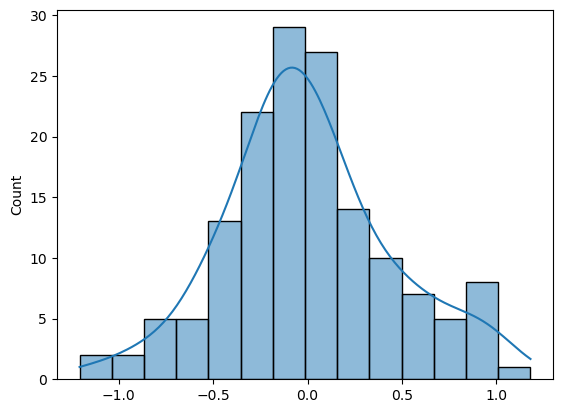

In [32]:
residuals = pd.Series(residuals.T[0])
sns.histplot(data=residuals, kde=True)
None

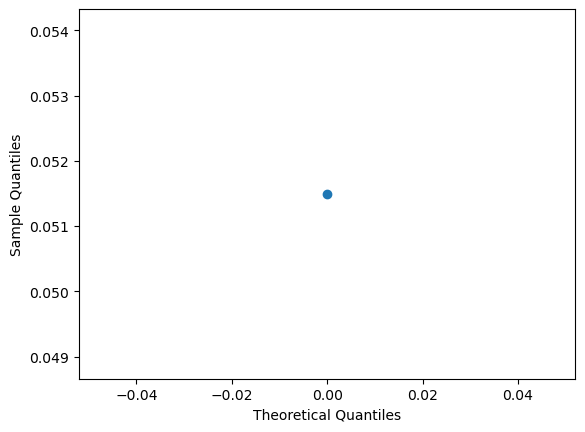

In [33]:
fig = sm.qqplot(pd.Series(residuals.T[0]), line='s')
plt.show()

In [34]:
expected = norm(loc=residuals.mean(), scale=residuals.std()).rvs(size=100)
ks_test = kstest(residuals, expected)
chis_test = chisquare(f_obs=residuals.value_counts(), ddof=0, axis=None)
print('Kolmogorov-Smirnov test: ' + str(ks_test.pvalue))

Kolmogorov-Smirnov test: 0.8542480430083349


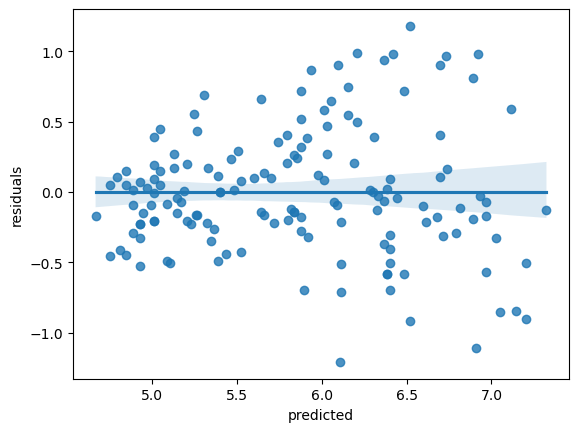

In [35]:
predicted_residuals = pd.concat([residuals, 
                                              pd.Series(data=predicted_values.T[0])], axis=1,
                               keys= ['residuals', 'predicted'])
sns.regplot(
    x='predicted', 
    y='residuals', 
    data=predicted_residuals)
None

In [36]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

iris_data_frame = iris_data_frame.rename(columns={'sepal length (cm)':'sepallen',
                                 'sepal width (cm)':'sepalwid',
                                 'petal length (cm)':'petallen', 
                                'petal width (cm)':'petalwid'})

model = ols('sepallen ~ sepalwid + petalwid', data=iris_data_frame[['sepallen', 'sepalwid', 'petalwid']].astype(float)).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
sepalwid,3.903790,1.0,19.185423,2.241644e-05
petalwid,70.844996,1.0,348.172232,1.336716e-40
Residual,29.911100,147.0,NaN,NaN
